In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

1. satisfaction_level - Уровень удовлетворенности работой (кол)
2. Last_evaluation - Время с момента последней оценки в годах (кол)
3. number_projects - Количество проектов, выполненных за время работы (кол)
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц (кол)
5. time_spend_company - Стаж работы в компании в годах (кол)
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником (кат)
7. left - уволился ли сотрудник (кат)
8. promotion_last_5years - повышался ли сотрудник за последние пять лет (кат)
9. department - отдел в котором работает сотрудник (кат)
10. salary - относительный уровень зарплаты (кат)

# **Задание 1**
Загрузите файл HR.csv в pandas dataframe

In [512]:
hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [513]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **Задание 2**
Рассчитайте основные статистики для переменных\
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [514]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# **Задание 3**
Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.\
Определите две самые скоррелированные и две наименее
скоррелированные переменные.

In [515]:
corr_hrmap = hr_df.corr(numeric_only=True)
corr_hrmap.style.background_gradient(cmap='RdYlGn', vmin=-1, vmax=1).highlight_max(color='#5ccd89').highlight_min(color='#f78f86')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [516]:
# Минимальная корреляция между переменными satisfaction_level и left
# Максимальная корреляция между переменными average_montly_hours и number_project

# P.S. не смог кодом вывести максимум, поэтому текстом

# **Задание 4**
Рассчитайте сколько сотрудников работает в каждом
департаменте.

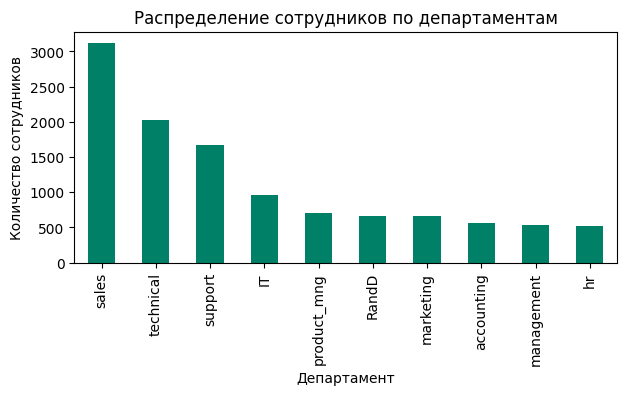

In [517]:
hr_df[hr_df['left'] == 0]['department'].value_counts().plot(kind='bar', title='Распределение сотрудников по департаментам', colormap='summer', figsize=(7, 3));
plt.xlabel('Департамент');
plt.ylabel('Количество сотрудников');

# **Задание 5**
Показать распределение сотрудников по зарплатам.

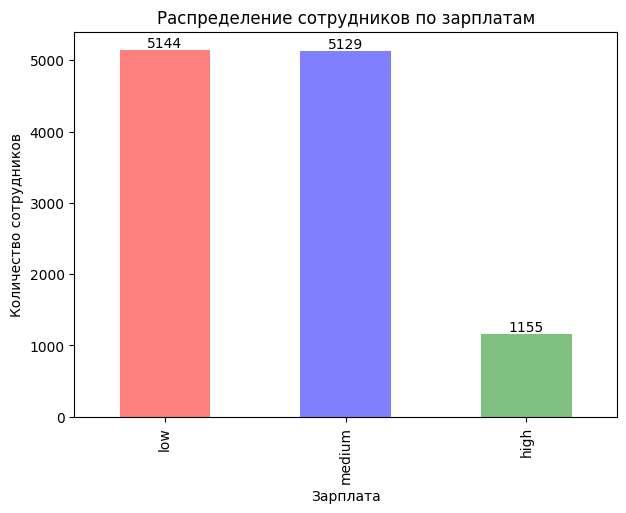

In [518]:
hr_df[hr_df['left'] == 0]['salary'].value_counts().plot(kind='bar', title='Распределение сотрудников по зарплатам', figsize=(7, 5), color=['red', 'blue', 'green'], alpha=0.5);
plt.bar_label(plt.gca().containers[0]);
plt.xlabel('Зарплата');
plt.ylabel('Количество сотрудников');

# **Задание 6**
Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности.

<ipython-input-519-ec0416279d5f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='department', y='salary', kind='violin', data=hr_df[hr_df['left'] == 0], height=5, aspect=3, palette='pastel');


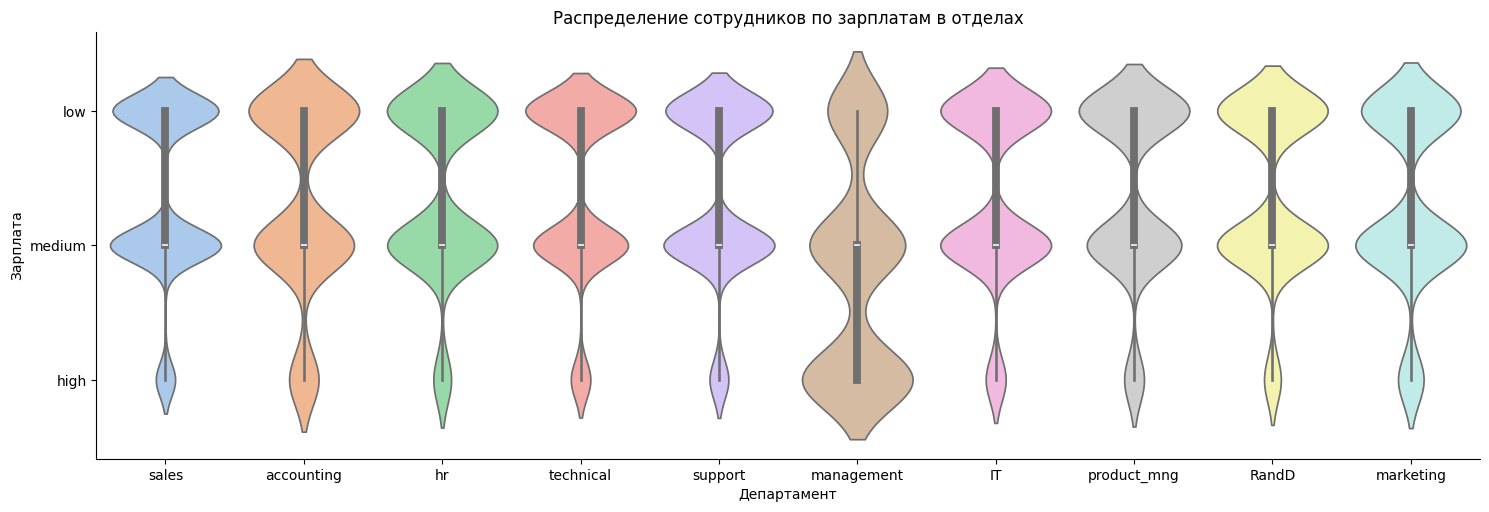

In [519]:
sns.catplot(x='department', y='salary', kind='violin', data=hr_df[hr_df['left'] == 0], height=5, aspect=3, palette='pastel');
plt.title('Распределение сотрудников по зарплатам в отделах');
plt.xlabel('Департамент');
plt.ylabel('Зарплата');

# **Задание 7**
Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.

Гипотеза

* H0: Сотрудники с высоким окладом проводят больше времени на работе чем сотрудники с низким окладом
* H1: Сотрудники с низким окладом проводят больше времени на работе чем сотрудники с высоким окладом

In [520]:
high_salary = hr_df.loc[(hr_df['left'] == 0) & (hr_df['salary'] == 'high'), 'average_montly_hours'].reset_index(drop = True)
high_salary.head()

0    144
1    148
2    215
3    172
4    207
Name: average_montly_hours, dtype: int64

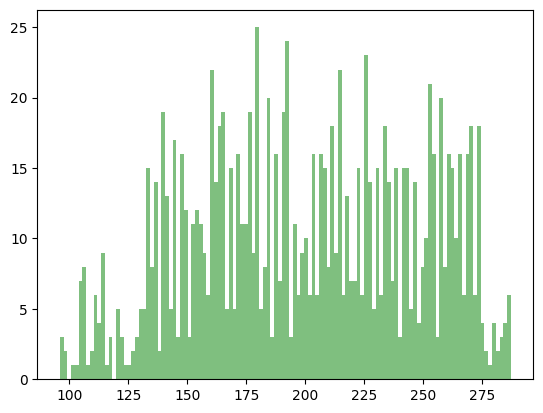

In [521]:
plt.hist(high_salary, bins = 120, color = 'green', alpha = 0.5);

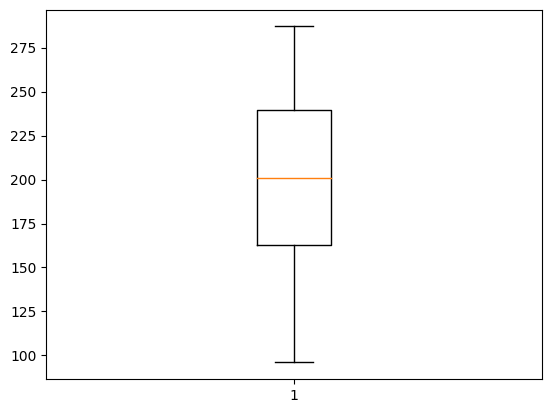

In [522]:
plt.boxplot(high_salary);

In [523]:
low_salary = hr_df.loc[(hr_df['left'] == 0) & (hr_df['salary'] == 'low'), 'average_montly_hours'].reset_index(drop = True)
low_salary.head()

0    215
1    202
2    193
3    247
4    214
Name: average_montly_hours, dtype: int64

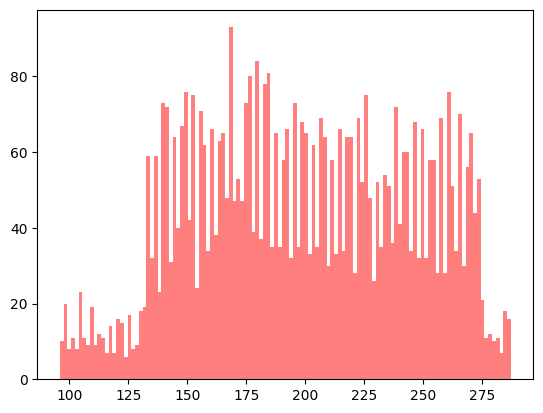

In [524]:
plt.hist(low_salary, bins = 120, color = 'red', alpha = 0.5);

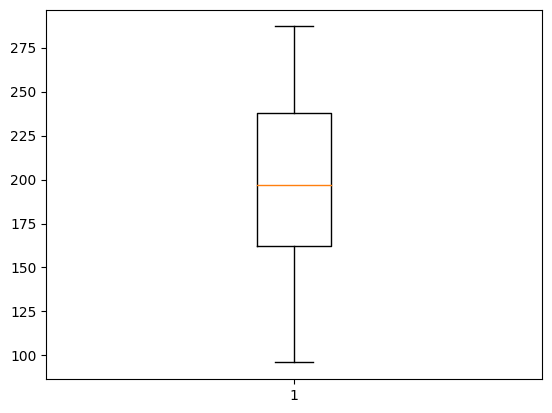

In [525]:
plt.boxplot(low_salary);

In [526]:
def check_normality(data):
    stat, p = stats.normaltest(data)
    print(f'Статистика = {stat:.3f}, p = {p:.3f}')

    if p < 0.05:
        print('Отклоняем нулевую гипотезу >> Данные распределены не нормально')
    else:
        print('Не отклоняем нулевую гипотезу >> Данные распределены нормально')

In [527]:
check_normality(high_salary)
check_normality(low_salary)

Статистика = 234.981, p = 0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально
Статистика = 962.463, p = 0.000
Отклоняем нулевую гипотезу >> Данные распределены не нормально


In [528]:
stat, p = stats.mannwhitneyu(high_salary, low_salary)
print(f'Статистика = {stat:.3f}, p = {p:.3f}')

if p < 0.05:
    print('Отклоняем нулевую гипотезу >> Сотрудники с низким окладом проводят больше времени на работе чем сотрудники с высоким окладом')
else:
    print('Не отклоняем нулевую гипотезу >> Сотрудники с высоким окладом проводят больше времени на работе чем сотрудники с низким окладом')

Статистика = 3039300.500, p = 0.219
Не отклоняем нулевую гипотезу >> Сотрудники с высоким окладом проводят больше времени на работе чем сотрудники с низким окладом


# **Задание 8**
Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
*   Доля сотрудников с повышением за последние 5 лет
*   Средняя степень удовлетворенности
*   Среднее количество проектов

In [529]:
hr_df['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

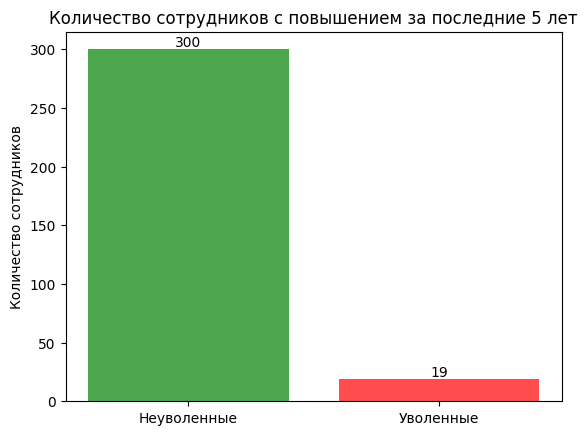

In [530]:
plt.bar(['Неуволенные', 'Уволенные'],
        [hr_df.loc[(hr_df['left'] == 0) & (hr_df['promotion_last_5years'] == 1)].shape[0],
         hr_df.loc[(hr_df['left'] == 1) & (hr_df['promotion_last_5years'] == 1)].shape[0]],
         color=['green', 'red'],
         alpha=0.7);\
plt.ylabel('Количество сотрудников');
plt.title('Количество сотрудников с повышением за последние 5 лет');
plt.bar_label(plt.gca().containers[0]);

In [532]:
print(f"Средняя степень удовлетворенности неуволенных сотрудников: {hr_df.loc[(hr_df['left'] == 0)]['satisfaction_level'].mean().round(2)}\
        \nСредняя степень удовлетворенности уволенных сотрудников: {hr_df.loc[(hr_df['left'] == 1)]['satisfaction_level'].mean().round(2)}")

Средняя степень удовлетворенности неуволенных сотрудников: 0.67        
Средняя степень удовлетворенности уволенных сотрудников: 0.44


In [533]:
print(f"Среднее кол-во проектов неуволенных сотрудников: {hr_df.loc[(hr_df['left'] == 0)]['number_project'].mean().round(2)}\
        \nСреднее кол-во проектов уволенных сотрудников: {hr_df.loc[(hr_df['left'] == 1)]['number_project'].mean().round(2)}")

Среднее кол-во проектов неуволенных сотрудников: 3.79        
Среднее кол-во проектов уволенных сотрудников: 3.86
